Library Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
from sklearn import preprocessing         
import numpy as np
import pylab as pl
%matplotlib inline

Path of Datasets

In [ ]:
titanic_df = pd.read_csv('/content/RAD/Tugas 1/train.csv')
titanic_df.head()

Dealing with missing values & outliers

In [ ]:
#Missing Values and Eliminates row that having missing column value
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 1 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percentage'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Percentage', ascending=False).round(6)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

Display missing values


Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,Percentage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245


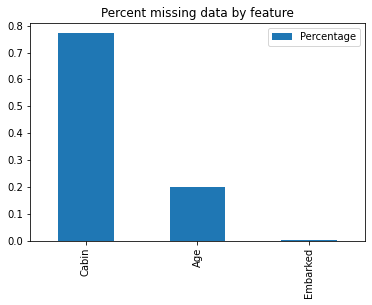

In [ ]:
missing_values = missing_values_table(titanic_df)
display(missing_values)
missing_values[['Percentage']].plot(kind='bar', title='Percent missing data by feature')

Data Cleansing

<Figure size 1440x720 with 0 Axes>

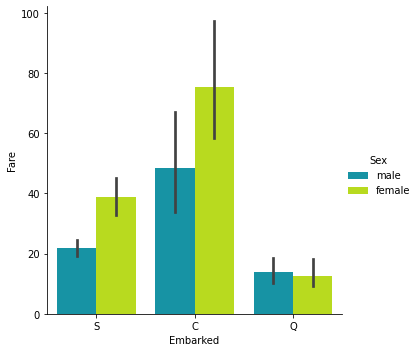

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
#Error Limit Error Value
clean_df = titanic_df
tresh = len(titanic_df) * .3 
titanic_df.dropna(thresh = thresh, axis = 1, inplace = True)
#Plotting
plt.figure(figsize=(20,10))
plot = sns.catplot(x = "Embarked", y = "Fare", hue = "Sex", data = clean_df, palette = ('nipy_spectral'), kind = "bar")
plt.show()
display(clean_df[clean_df['Embarked'].isnull()])

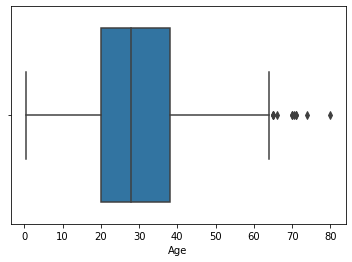

In [ ]:
#Two people having same Fare
clean_df['Embarked'].fillna('C', inplace = True)
sns.boxplot(clean_df.Age)

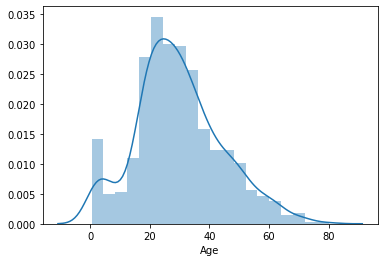

In [ ]:
sns.distplot(clean_df.Age)

In [ ]:
clean_df['Age'].fillna(clean_df['Age'].mode(), inplace=True)

Feature Engineering

In [ ]:
#Creating Title Column
clean_df['Title'] = pd.Series((name.split('.')[0].split(',')[1].strip() for name in clean_df['Name']), index=clean_df.index)
clean_df['Title'] = clean_df['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
clean_df['Title'] = clean_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
clean_df['Title'] = clean_df['Title'].replace('Mme', 'Mrs')

#Creating "Family"
clean_df['FamilySize'] = clean_df['SibSp'] + clean_df['Parch'] + 1
clean_df['FamilySize'][clean_df['FamilySize'].between(1, 5, inclusive=False)] = 2
clean_df['FamilySize'][clean_df['FamilySize']>5] = 3
clean_df['FamilySize'] = clean_df['FamilySize'].map({1: 'Alone', 2: 'Medium', 3: 'Large'})

#Alone or a child
clean_df['IsAlone'] = np.where(clean_df['FamilySize']!=1, 0, 1)
clean_df['IsChild'] = clean_df['Age'] < 18
clean_df['IsChild'] = clean_df['IsChild'].astype(int)  

#Print Values
clean_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone,IsChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Medium,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Medium,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Alone,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Medium,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Alone,0,0


In [ ]:
clean_df = titanic_df.drop(['Name', 'Ticket', 'PassengerId'], 1)    
clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,IsChild
0,0,3,male,22.0,1,0,7.2500,S,Mr,Medium,0,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,Medium,0,0
2,1,3,female,26.0,0,0,7.9250,S,Miss,Alone,0,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,Medium,0,0
4,0,3,male,35.0,0,0,8.0500,S,Mr,Alone,0,0


Handling Categorical Features

In [ ]:
#Type Category
clean_df['Sex'] = clean_df['Sex'].astype('category')
clean_df['Embarked'] = clean_df['Embarked'].astype('category')
clean_df['Title'] = clean_df['Title'].astype('category')
clean_df['FamilySize'] = clean_df['FamilySize'].astype('category')

#Using OneHot Encoding
clean_df = pd.get_dummies(data=clean_df, drop_first=True)
clean_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,IsAlone,IsChild,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamilySize_Large,FamilySize_Medium
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,1,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,0,0,1,1,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,1,0,0,0,0


Feature Scaling

,Pclass,Age,SibSp,Parch,Fare,IsAlone,IsChild,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamilySize_Large,FamilySize_Medium
0,0.827377,-0.530377,0.432793,-0.473674,-0.502445,0.0,-0.381109,0.737695,-0.307562,0.619306,-0.511898,0.850532,-0.405840,-0.162781,-0.235981,1.432260
1,-1.566107,0.571831,0.432793,-0.473674,0.786845,0.0,-0.381109,-1.355574,-0.307562,-1.614710,-0.511898,-1.175735,2.464027,-0.162781,-0.235981,1.432260
2,0.827377,-0.254825,-0.474545,-0.473674,-0.488854,0.0,-0.381109,-1.355574,-0.307562,0.619306,1.953514,-1.175735,-0.405840,-0.162781,-0.235981,-0.698197
3,-1.566107,0.365167,0.432793,-0.473674,0.420730,0.0,-0.381109,-1.355574,-0.307562,0.619306,-0.511898,-1.175735,2.464027,-0.162781,-0.235981,1.432260
4,0.827377,0.365167,-0.474545,-0.473674,-0.486337,0.0,-0.381109,0.737695,-0.307562,0.619306,-0.511898,0.850532,-0.405840,-0.162781,-0.235981,-0.698197


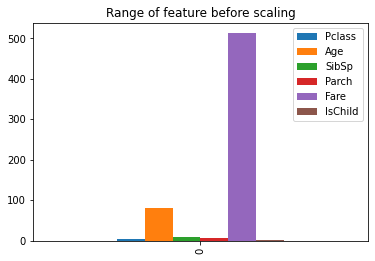

In [ ]:
ranges = clean_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'IsChild']].max().to_frame().T
ranges.plot(kind='bar',title='Range of feature before scaling')
X = clean_df.drop(['Survived'], 1)
y = clean_df['Survived']

# Feature scaling of our data
sc = preprocessing.StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)
X.head()